In [4]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 创建模拟数据
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 应用k-means聚类
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_

# 计算轮廓系数
silhouette_avg = silhouette_score(X, labels)
print(f'轮廓系数: {silhouette_avg:.2f}')

轮廓系数: 0.68


轮廓系数

In [2]:
from sklearn.metrics import davies_bouldin_score

# 计算戴维森堡丁指数
db_score = davies_bouldin_score(X, labels)
print(f'戴维森堡丁指数: {db_score:.2f}')

戴维森堡丁指数: 0.44


戴维森堡丁指数

In [3]:
from sklearn.metrics import pairwise_distances

# 计算簇内距离
def intra_cluster_distance(X, labels):
    n_clusters = len(set(labels))  # 获取聚类簇的数量
    intra_distances = []  # 用于存储每个簇的簇内距离
    for cluster_label in range(n_clusters):
        cluster_points = X[labels == cluster_label]  # 获取属于当前簇的样本点
        cluster_center = cluster_points.mean(axis=0)  # 计算当前簇的中心点
        distance_to_center = pairwise_distances(cluster_points, [cluster_center])  # 计算当前簇中每个样本点到中心点的距离
        intra_distances.append(distance_to_center.mean())  # 将距离的平均值添加到簇内距离列表中
    return sum(intra_distances) / n_clusters  # 返回簇内距离的平均值

# 使用示例数据
intra_distance = intra_cluster_distance(X, labels)
print(f'簇内距离: {intra_distance:.2f}')


簇内距离: 0.74


簇内距离

In [13]:
import numpy as np
from sklearn import metrics
y_true = [0, 0, 1, 1, 1, 2]  # 真实标签
labels = [0, 0, 1, 2, 2, 1]  # 聚类标签
def purity_score(y_true, y_pred):
    # 计算纯度
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

# 假设 y_true 是真实标签，y_pred 是聚类标签
purity = purity_score(y_true, labels)
print(f'纯度: {purity:.2f}')

纯度: 0.83


纯度

In [11]:
from sklearn.metrics import adjusted_rand_score

# 计算调整后的兰德指数
ari_score = adjusted_rand_score(y_true, labels)
print(f'调整后的兰德指数: {ari_score:.2f}')

调整后的兰德指数: 0.44


兰德指数

In [12]:
from sklearn.metrics import adjusted_mutual_info_score

# 计算调整后的互信息
ami_score = adjusted_mutual_info_score(y_true, labels)
print(f'调整后的互信息: {ami_score:.2f}')

调整后的互信息: 0.50


互信息

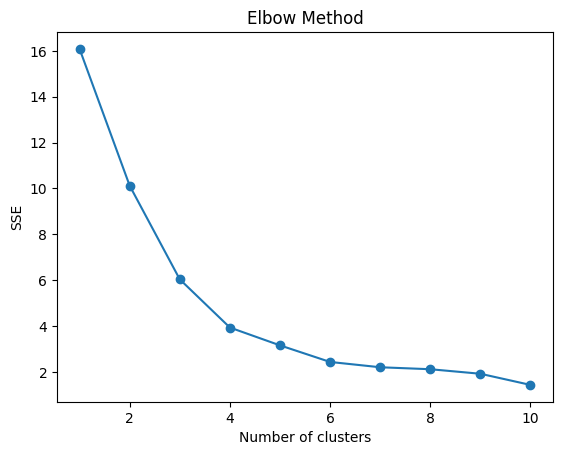

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# 生成示例数据集
np.random.seed(0)
X = np.random.rand(100, 2)  # 生成100个二维数据点
# 计算不同簇数的聚类误差
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# 绘制肘部图
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

聚类算法评估的肘部法则

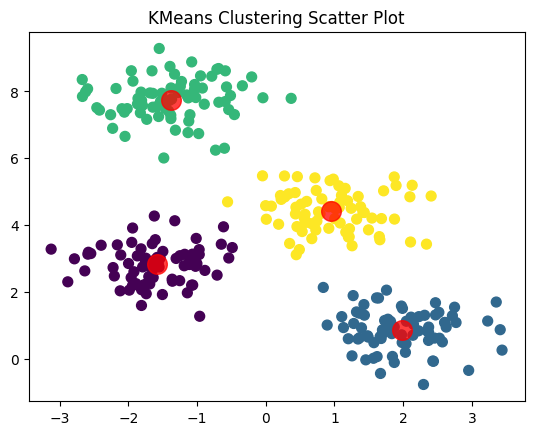

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 生成模拟数据
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 应用KMeans聚类
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# 绘制散点图
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('KMeans Clustering Scatter Plot')
plt.show()

散点图

Q:\anacondaprojects\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


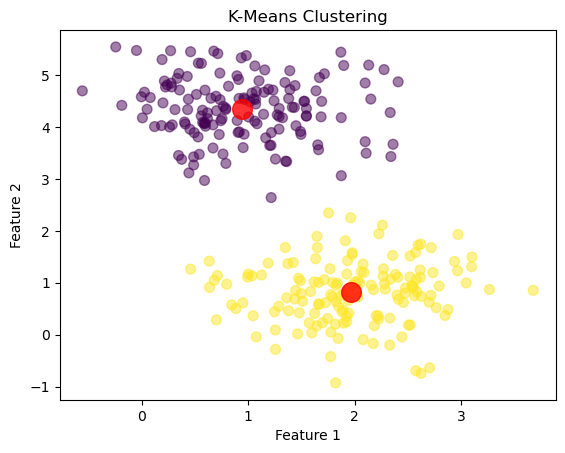

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 生成随机数据
X, _ = make_blobs(n_samples=300, centers=2, cluster_std=0.6, random_state=0)

# 初始化KMeans实例，设置簇数k
kmeans = KMeans(n_clusters=2, random_state=0)

# 应用KMeans算法
kmeans.fit(X)

# 获取簇中心
centers = kmeans.cluster_centers_

# 获取每个点的簇标签
labels = kmeans.labels_

# 可视化数据和聚类结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


k均值聚类算法

Q:\anacondaprojects\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
Q:\anacondaprojects\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
Q:\anacondaprojects\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
Q:\anacondaprojects\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

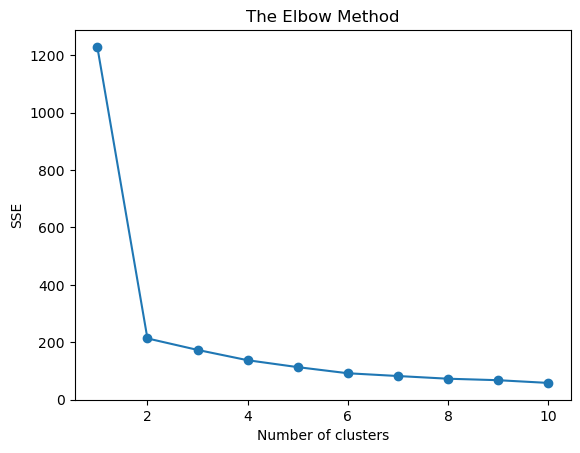

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# 计算不同k值对应的簇内误差平方和
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    sse.append(kmeans.inertia_)

# 绘制肘部图
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('The Elbow Method')
plt.show()

k值选择里的肘部法则

Q:\anacondaprojects\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
Q:\anacondaprojects\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
Q:\anacondaprojects\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
Q:\anacondaprojects\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

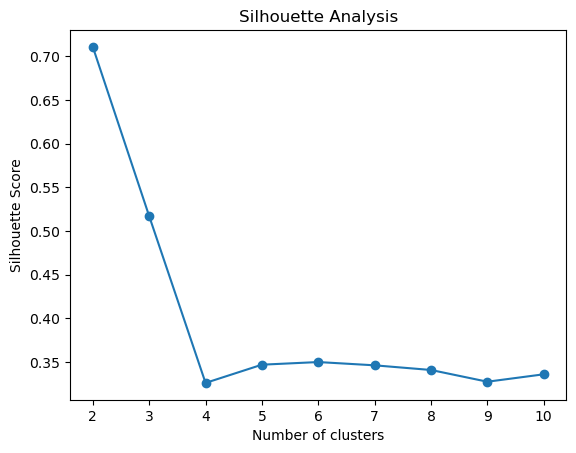

In [10]:
from sklearn.metrics import silhouette_score
# 计算不同k值的轮廓系数
silhouette_avg_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_avg_scores.append(silhouette_avg)

# 绘制轮廓系数图
plt.plot(range(2, 11), silhouette_avg_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

轮廓分析

Q:\anacondaprojects\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
Q:\anacondaprojects\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


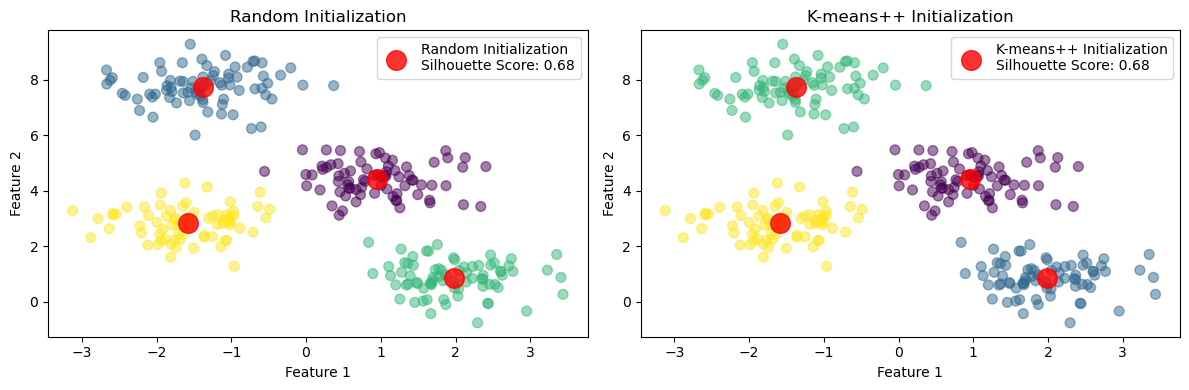

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 生成随机数据
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# 使用随机初始化方法
kmeans_random = KMeans(n_clusters=4, init='random', random_state=0)
kmeans_random.fit(X)
centers_random = kmeans_random.cluster_centers_
silhouette_random = silhouette_score(X, kmeans_random.labels_)

# 使用K-means++初始化方法
kmeans_kmeans_plus = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans_kmeans_plus.fit(X)
centers_kmeans_plus = kmeans_kmeans_plus.cluster_centers_
silhouette_kmeans_plus = silhouette_score(X, kmeans_kmeans_plus.labels_)

# 绘制结果
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_random.labels_, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centers_random[:, 0], centers_random[:, 1], c='red', s=200, alpha=0.8, label=f'Random Initialization\nSilhouette Score: {silhouette_random:.2f}')
plt.title('Random Initialization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_kmeans_plus.labels_, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centers_kmeans_plus[:, 0], centers_kmeans_plus[:, 1], c='red', s=200, alpha=0.8, label=f'K-means++ Initialization\nSilhouette Score: {silhouette_kmeans_plus:.2f}')
plt.title('K-means++ Initialization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()


kmeans++优化（还需要改进）

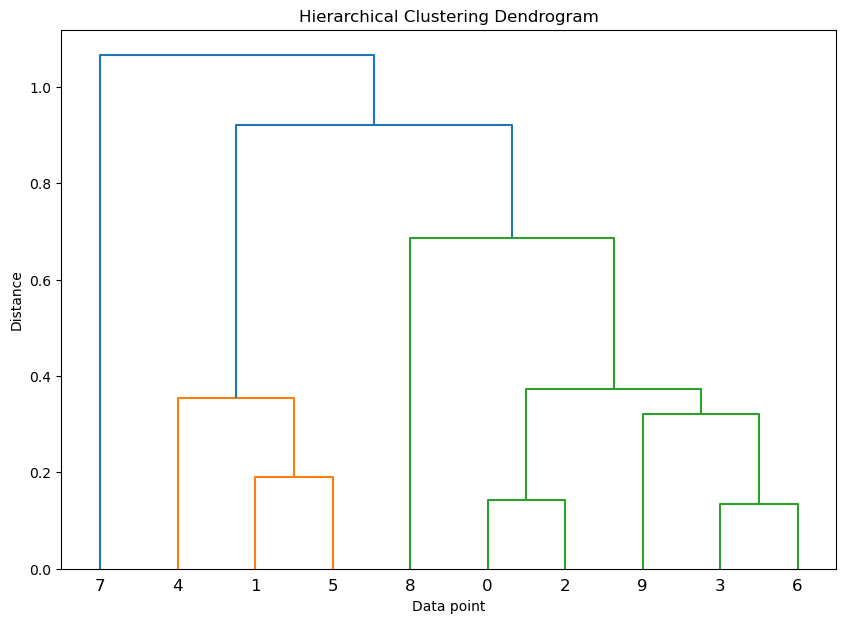

In [16]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 生成示例数据集
np.random.seed(0)
X = np.random.rand(10, 2)  # 生成10个二维数据点

# 使用凝聚型层次聚类，并选择'ward'作为链接标准
Z = linkage(X, 'ward')

# 绘制树状图
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()


层次聚类

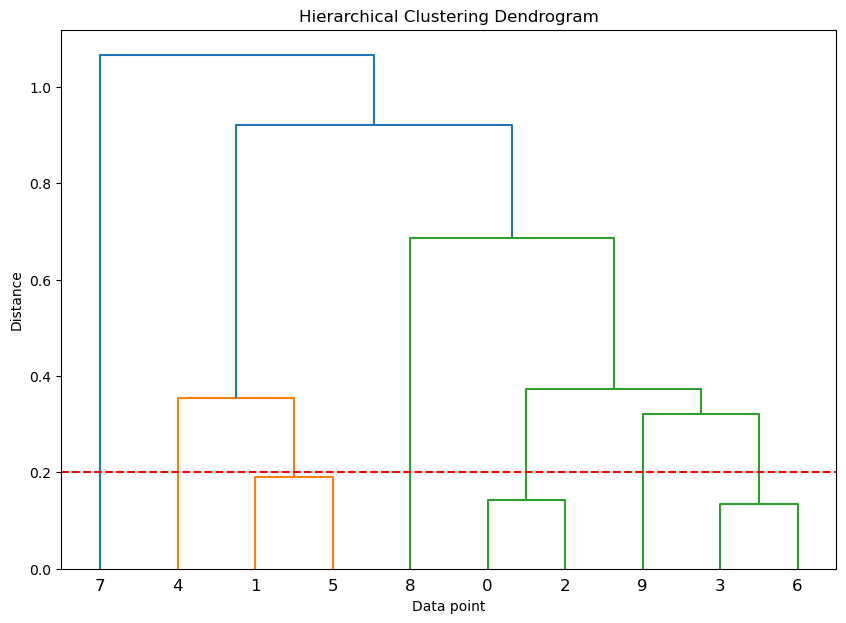

In [18]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 生成示例数据集
np.random.seed(0)
X = np.random.rand(10, 2)  # 生成10个二维数据点

# 使用凝聚型层次聚类，并选择'ward'作为链接标准
Z = linkage(X, 'ward')
# 设置距离阈值
distance_threshold = 0.2

# 绘制树状图，并画一条指定距离的横线
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.axhline(y=distance_threshold, color='r', linestyle='--')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()

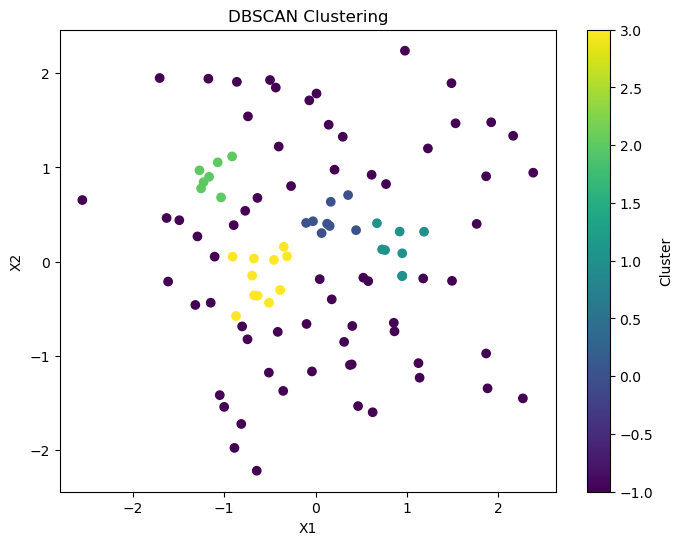

In [19]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# 生成示例数据集
np.random.seed(0)
X = np.random.randn(100, 2)  # 生成100个二维随机数据点

# 初始化DBSCAN算法
dbscan = DBSCAN(eps=0.3, min_samples=5)

# 拟合数据
clusters = dbscan.fit_predict(X)

# 绘制聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Cluster')
plt.show()


DBSCAN

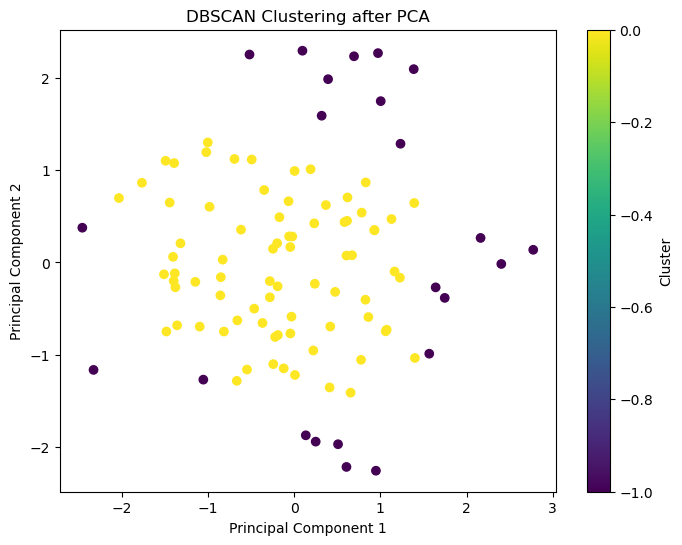

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 初始化PCA，设置降维后的维数，例如降到2维
pca = PCA(n_components=2)

# 对数据进行降维
X_reduced = pca.fit_transform(X)

# 在降维后的数据上应用DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_reduced)
# 绘制聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

基于密度的聚类算法与PCA联系

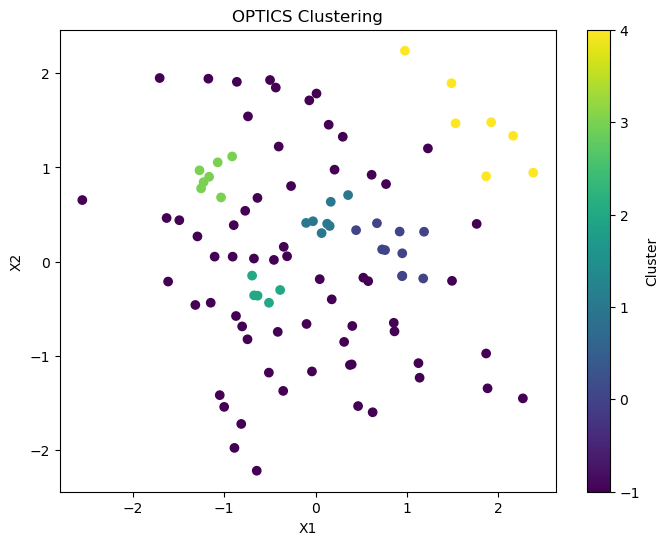

In [23]:
from sklearn.cluster import OPTICS
import numpy as np
import matplotlib.pyplot as plt

# 生成示例数据集
np.random.seed(0)
X = np.random.randn(100, 2)  # 生成100个二维随机数据点

# 初始化OPTICS算法
optics = OPTICS(min_samples=5)

# 拟合数据
optics.fit(X)

# 获取聚类标签
clusters = optics.labels_

# 绘制聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.title('OPTICS Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Cluster')
plt.show()


OPTICS

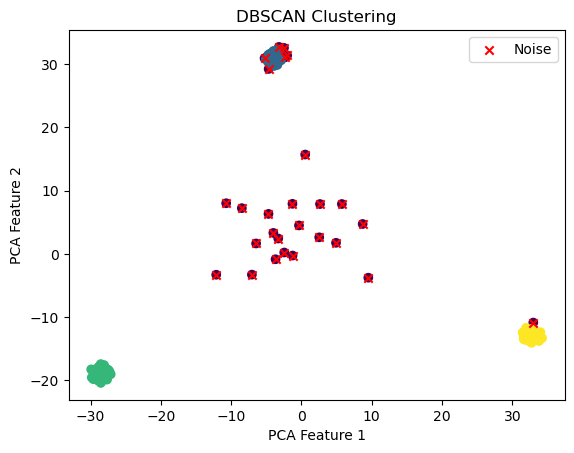

In [28]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 创建一个包含3个簇的合成数据集，每个簇的数据点数为100，特征维度为50
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0, n_features=50)

# 添加一些随机噪声点
noise = np.random.uniform(low=-10, high=10, size=(20, 50))
X = np.vstack([X, noise])

# 初始化PCA，降至2维以便于可视化
pca = PCA(n_components=2)

# 对数据进行降维
X_reduced = pca.fit_transform(X)

# 初始化DBSCAN算法
dbscan = DBSCAN(eps=0.5, min_samples=5)

# 在降维后的数据上应用DBSCAN算法进行聚类
clusters = dbscan.fit_predict(X_reduced)

# 绘制聚类结果

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', marker='o')

# 标记噪声点
plt.scatter(X_reduced[clusters == -1, 0], X_reduced[clusters == -1, 1], c='red', marker='x', label='Noise')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

聚类算法应用